In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [40]:
gold_dataset = pd.read_csv("gold_price.csv")

In [41]:
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [42]:
gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [43]:
gold_dataset.shape

(2290, 6)

In [44]:
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [45]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [46]:
gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [47]:
correlation = gold_dataset.corr()

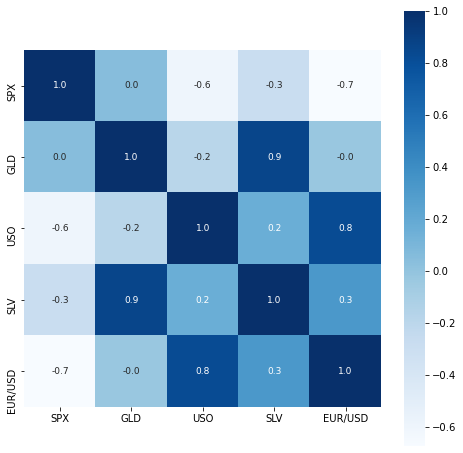

In [48]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size': 9}, cmap = 'Blues')

In [49]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


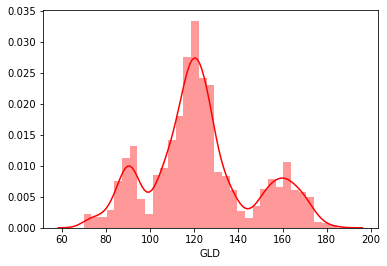

In [50]:
sns.distplot(gold_dataset['GLD'], color = 'Red')

In [51]:
X = gold_dataset.drop({'Date', 'GLD'}, axis = 1)
Y = gold_dataset['GLD']

In [52]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [53]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [55]:
regressor_model = RandomForestRegressor()

In [56]:
regressor_model.fit(X_train, Y_train)

RandomForestRegressor()

In [57]:
test_data_prediction = regressor_model.predict(X_test)

In [58]:
print(test_data_prediction)

[163.9108001  127.47029925 124.26989942 119.70019894 125.94579896
  86.61929809 171.85790192 135.95210034 106.84410073 132.90370195
 120.77279956 124.80730029 143.58999757 104.50039946  80.83119924
 119.96379979 140.55939964  90.38140008  91.48959941 128.35570261
 125.64359987 147.84129953 116.76150193 153.16809903 129.4989982
 130.09480103 118.40940094 111.39330036 168.90160277 157.96899747
 125.76080163 154.03020156 127.07379955 122.58919786 116.1170016
 154.81710007 115.00089965 120.60910112 103.83840218 105.38479998
 134.94239901  85.7506992  156.55360167 121.23950013 122.44960101
 155.54349978 120.28909987 116.58799956 168.98400289 116.33790055
 137.80480204 162.07489876 157.96229981 153.24180067 124.2428999
 116.95290008 167.11500082 117.25649984 165.75930038  84.44519979
 121.3573992  122.32950004 120.10690019 171.98099932 118.87179966
 180.50389687 162.27030292 138.74780169 115.65030006  92.5785007
 171.90420001 117.66639949 117.89689839 125.55680011 147.40579913
  91.19300091 

In [59]:
error = metrics.r2_score(Y_test, test_data_prediction)

In [60]:
print("R Squared Error: ", error)

R Squared Error:  0.9853978925288737


In [61]:
Y_test = list(Y_test)

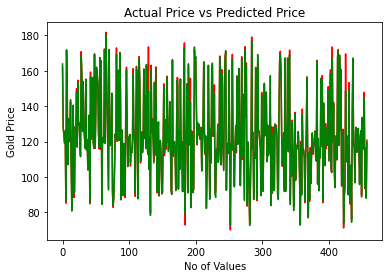

In [62]:
plt.plot(Y_test, color = 'Red', label = 'Actual Values')
plt.plot(test_data_prediction, color = 'Green', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('No of Values')
plt.ylabel('Gold Price')
#plt.legend()
plt.show()